In [1]:
import numpy as np
import fuzzy
import matplotlib.pyplot as plt
import genetico
import pandas as pd

/var/folders/nx/r46v348x4k30hz1gmq94sv7m0000gp/T/ipykernel_18949/4228385664.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Modelo I

In [21]:
fis = fuzzy.mandani()
fis.add_var({"type":"input","name":"pop","range":[0.0,1.0]})
fis.add_var({"type":"input","name":"fav","range":[0.0,1.0]})
fis.add_var({"type":"output","name":"ctrl","range":[0.0,0.5]})

fis.add_mfs({"vartype":"input","varname":"pop","mfname":"BI","params":[0.0,0.0,0.20]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"B","params":[0.0,0.20,0.4]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"M","params":[0.2,0.4,0.6]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"MA","params":[0.4,0.6,0.8]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"A","params":[0.6,0.8,1.0]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"AT","params":[0.8,1.0,1.0]})


fis.add_mfs({"vartype":"input","varname":"fav","mfname":"BI","params":[0.0,0.0,0.20]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"B","params":[0.0,0.20,0.4]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"M","params":[0.2,0.4,0.6]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"MA","params":[0.4,0.6,0.8]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"A","params":[0.6,0.8,1.0]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"AT","params":[0.8,1.0,1.0]})


fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"BI","params":[0.0,0.0,0.10]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"B","params":[0.0,0.10,0.2]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"M","params":[0.1,0.2,0.3]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"MA","params":[0.2,0.3,0.4]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"A","params":[0.3,0.4,0.5]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"AT","params":[0.4,0.5,0.5]})



#cria regras
for p in ["BI","B","M","MA","A","AT"]:
    for f in ["BI","B","M","MA","A","AT"]:
        fis.add_rule({"pop":p,"fav":f},{"ctrl":"BI"})


In [27]:
def dinamica(to,po,n):
    p = [po]
    fcn = lambda t: 0.5+0.5*np.cos(2*np.pi*t/12)
    for i in range(n):
        fav = fcn(to+i)
        pn = p[i]+fav
        p.append(pn)
    
    return p


def dinamicafis(to,po,n,fis):
    p = [po]
    fcn = lambda t: 0.5+0.5*np.cos(2*np.pi*t/12)
    u = [0]
    for i in range(n):
        fav = 0.10*fcn(to+i)
        res = fis.eval([p[i],fav]) 
        pn = (p[i]+fav)*(1-res["ctrl"])
        p.append(pn)
        u.append(res["ctrl"])
    
    return p,u

labels = ["BI","B","M","MA","A","AT"]
def objetivo(x):
    fis.rules = {}
    cnt = 0
    for p in labels:
        for f in labels:
            fis.add_rule({"pop":p,"fav":f},{"ctrl":labels[x[cnt]]})
            cnt = cnt+1
    
    pp,uu = dinamicafis(0,0.05,12,fis)

    obj = (pp[-1]-0.3)**2+0.1*sum([u**2 for u in uu ])

    return obj
    


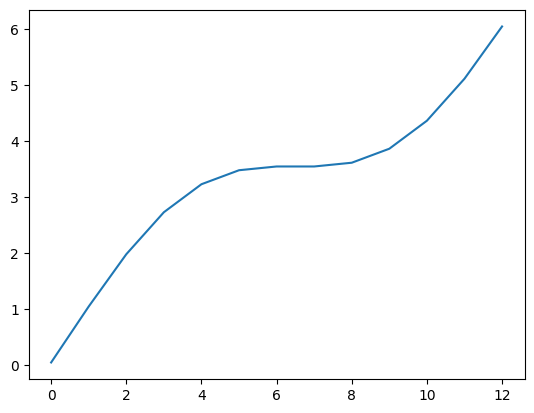

In [28]:
p = dinamica(0,0.05,12)
plt.plot(p)

In [29]:
gen = genetico.genetico()
gen.objetivo = lambda x:objetivo(x)
gen.genetic_algorithm()
labels = ["BI","B","M","MA","A","AT"]
x = gen.population[0]
fis.rules = {}
cnt = 0
for p in labels:
    for f in labels:
        fis.add_rule({"pop":p,"fav":f},{"ctrl":labels[x[cnt]]})
        cnt = cnt+1

Generation 1: Best fitness = 0.018635159677880486, Best individual = [1, 0, 4, 1, 4, 4, 0, 0, 4, 2, 3, 3, 2, 5, 4, 3, 0, 4, 2, 0, 2, 0, 0, 1, 2, 3, 1, 3, 4, 1, 4, 2, 4, 4, 3, 4]
Generation 2: Best fitness = 0.018635159677880486, Best individual = [1, 0, 4, 1, 4, 4, 0, 0, 4, 2, 3, 3, 2, 5, 4, 3, 0, 4, 2, 0, 2, 0, 0, 1, 2, 3, 1, 3, 4, 1, 4, 2, 4, 4, 3, 4]
Generation 3: Best fitness = 0.012986524777927808, Best individual = [0, 1, 1, 0, 5, 3, 0, 1, 3, 3, 1, 2, 2, 2, 1, 3, 1, 1, 0, 2, 2, 0, 0, 4, 5, 0, 5, 1, 3, 0, 5, 5, 2, 2, 4, 4]
Generation 4: Best fitness = 0.012986524777927808, Best individual = [0, 1, 1, 0, 5, 3, 0, 1, 3, 3, 1, 2, 2, 2, 1, 3, 1, 1, 0, 2, 2, 0, 0, 4, 5, 0, 5, 1, 3, 0, 5, 5, 2, 2, 4, 4]
Generation 5: Best fitness = 0.012986524777927808, Best individual = [0, 1, 1, 0, 5, 3, 0, 1, 3, 3, 1, 2, 2, 2, 1, 3, 1, 1, 0, 2, 2, 0, 0, 4, 5, 0, 5, 1, 3, 0, 5, 5, 2, 2, 4, 4]
Generation 6: Best fitness = 0.011930652363577668, Best individual = [1, 0, 4, 2, 4, 5, 0, 0, 4, 5, 1, 2, 1, 2

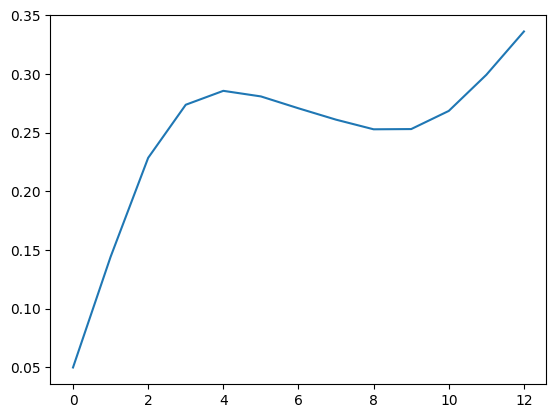

In [30]:
pp,uu = dinamicafis(0,0.05,12,fis)
plt.plot(pp)

In [42]:
dd = fis.rules
tabela = pd.DataFrame(index=labels)
for k,v in dd.items():
    xx = v["antecedent"]
    yy = v["consequent"]
    tabela.loc[xx["fav"],xx["pop"]] = yy['ctrl']
tabela

,BI,B,M,MA,A,AT
BI,BI,BI,BI,BI,MA,AT
B,BI,BI,M,M,B,B
M,AT,AT,B,B,A,A
MA,M,MA,MA,BI,B,B
A,A,A,B,B,A,BI
AT,AT,M,M,A,BI,BI


#### Modelo II

In [2]:
fis = fuzzy.mandani()
fis.add_var({"type":"input","name":"pop","range":[0.0,1.0]})
fis.add_var({"type":"input","name":"fav","range":[0.0,1.0]})
fis.add_var({"type":"output","name":"ctrl","range":[0.0,0.5]})
fis.add_var({"type":"output","name":"var","range":[-0.1,0.5]})

fis.add_mfs({"vartype":"input","varname":"pop","mfname":"BI","params":[0.0,0.0,0.20]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"B","params":[0.0,0.20,0.4]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"M","params":[0.2,0.4,0.6]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"MA","params":[0.4,0.6,0.8]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"A","params":[0.6,0.8,1.0]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"AT","params":[0.8,1.0,1.0]})


fis.add_mfs({"vartype":"input","varname":"fav","mfname":"BI","params":[0.0,0.0,0.20]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"B","params":[0.0,0.20,0.4]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"M","params":[0.2,0.4,0.6]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"MA","params":[0.4,0.6,0.8]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"A","params":[0.6,0.8,1.0]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"AT","params":[0.8,1.0,1.0]})


fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"BI","params":[0.0,0.0,0.10]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"B","params":[0.0,0.10,0.2]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"M","params":[0.1,0.2,0.3]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"MA","params":[0.2,0.3,0.4]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"A","params":[0.3,0.4,0.5]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"AT","params":[0.4,0.5,0.5]})


fis.add_mfs({"vartype":"output","varname":"var","mfname":"N","params":[-0.1,0,0]})
fis.add_mfs({"vartype":"output","varname":"var","mfname":"BI","params":[0.0,0.0,0.10]})
fis.add_mfs({"vartype":"output","varname":"var","mfname":"B","params":[0.0,0.10,0.2]})
fis.add_mfs({"vartype":"output","varname":"var","mfname":"M","params":[0.1,0.2,0.3]})
fis.add_mfs({"vartype":"output","varname":"var","mfname":"MA","params":[0.2,0.3,0.4]})
fis.add_mfs({"vartype":"output","varname":"var","mfname":"A","params":[0.3,0.4,0.5]})
fis.add_mfs({"vartype":"output","varname":"var","mfname":"AT","params":[0.4,0.5,0.5]})
fis.add_mfs({"vartype":"output","varname":"var","mfname":"N","params":[-0.1,0,0]})



#cria regras
labels = ["BI","B","M","MA","A","AT"]
labelsvar = ["N","BI","B","M","MA","A","AT"]
idx = [6,5,4,3,2,1,
        5,4,3,2,1,1,
        4,3,2,1,1,0,
        3,2,1,1,0,0,
        2,1,1,0,0,0,
        0,0,0,0,0,0]

cnt = 0
for p in labels:
    for f in labels[::-1]:
        fis.add_rule({"pop":p,"fav":f},{"ctrl":"BI",'var':labelsvar[idx[cnt]]})
        cnt = cnt+1


In [3]:
def dinamica2(to,po,n,fis):
    p = [po]
    fcn = lambda t: 0.5+0.5*np.cos(2*np.pi*t/12)
    u = [0]
    for i in range(n):
        fav = fcn(to+i)
        res = fis.eval([p[i],fav]) 
        pn = (1+res["var"])*p[i]*(1-res["ctrl"])
        p.append(pn)
        u.append(res["ctrl"])
    
    return p,u

labels = ["BI","B","M","MA","A","AT"]
def objetivo(x):
    fis.rules = {}
    cnt = 0
    for p in labels:
        for f in labels[::-1]:
            fis.add_rule({"pop":p,"fav":f},{"ctrl":labels[x[cnt]],'var':labelsvar[idx[cnt]]})
            cnt = cnt+1
    
    pp,uu = dinamica2(0,0.05,12,fis)

    obj = (pp[-1]-0.3)**2+0.1*sum([u**2 for u in uu ])

    return obj

In [4]:
gen = genetico.genetico()
gen.objetivo = lambda x:objetivo(x)
gen.genetic_algorithm()
labels = ["BI","B","M","MA","A","AT"]
x = gen.population[0]
fis.rules = {}

#cria regras
labels = ["BI","B","M","MA","A","AT"]
labelsvar = ["N","BI","B","M","MA","A","AT"]
idx = [6,5,4,3,2,1,
        5,4,3,2,1,1,
        4,3,2,1,1,0,
        3,2,1,1,0,0,
        2,1,1,0,0,0,
        0,0,0,0,0,0]

cnt = 0
for p in labels:
    for f in labels[::-1]:
        fis.add_rule({"pop":p,"fav":f},{"ctrl":labels[x[cnt]],'var':labelsvar[idx[cnt]]})
        cnt = cnt+1

Generation 1: Best fitness = 0.09969134886945161, Best individual = [0, 1, 0, 3, 1, 2, 1, 0, 3, 1, 5, 5, 3, 2, 3, 4, 1, 3, 0, 4, 4, 5, 5, 5, 2, 1, 1, 5, 3, 0, 3, 3, 1, 4, 4, 3]
Generation 2: Best fitness = 0.09969134886945161, Best individual = [0, 1, 0, 3, 1, 2, 1, 0, 3, 1, 5, 5, 3, 2, 3, 4, 1, 3, 0, 4, 4, 5, 5, 5, 2, 1, 1, 5, 3, 0, 3, 3, 1, 4, 4, 3]
Generation 3: Best fitness = 0.09969134886945161, Best individual = [0, 1, 0, 3, 1, 2, 1, 0, 3, 1, 5, 5, 3, 2, 3, 4, 1, 3, 0, 4, 4, 5, 5, 5, 2, 1, 1, 5, 3, 0, 3, 3, 1, 4, 4, 3]
Generation 4: Best fitness = 0.08577902442121788, Best individual = [0, 1, 0, 3, 1, 2, 1, 0, 2, 1, 3, 3, 0, 1, 0, 4, 2, 3, 5, 4, 0, 3, 1, 5, 3, 0, 3, 2, 3, 1, 4, 2, 5, 1, 3, 1]
Generation 5: Best fitness = 0.07514125441212942, Best individual = [0, 1, 0, 3, 1, 2, 1, 0, 3, 1, 2, 0, 5, 1, 4, 1, 2, 3, 2, 3, 0, 2, 0, 3, 4, 4, 0, 5, 0, 5, 4, 3, 4, 2, 5, 1]
Generation 6: Best fitness = 0.06759309457042798, Best individual = [0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 5, 1, 0, 1

In [ ]:
pp,uu = dinamica2(0,0.05,12,fis)

In [ ]:
plt.plot(uu)